# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('C:/Users/tubac/OneDrive/Desktop/Springboard/others/1585247986_Frequentist_Case_Study/Frequentist Case Study/insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

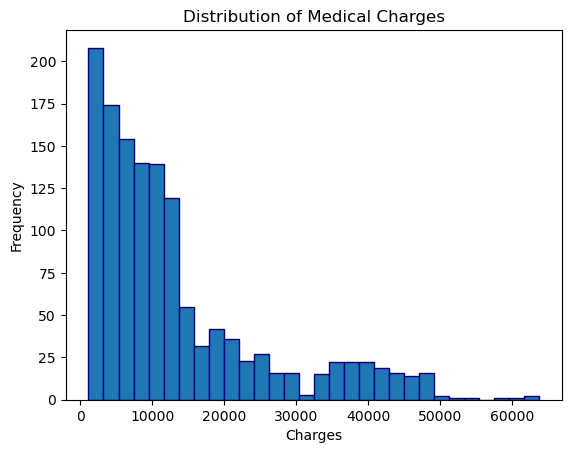

In [12]:
# plot the histogram of charges
plt.hist(medical['charges'], bins=30, edgecolor='navy')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [14]:
# calculate the mean and standard deviation of charges
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'])

print(f"Mean of charges: {mean_charges}")
print(f"Standard deviation of charges: {std_charges}")

Mean of charges: 13270.422265141257
Standard deviation of charges: 12105.484975561605


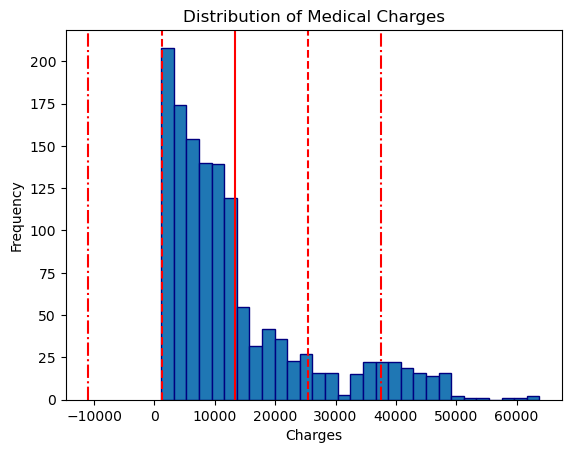

In [16]:
_ = plt.hist(medical['charges'], bins=30, edgecolor='navy')
_ = plt.title('Distribution of Medical Charges')
_ = plt.xlabel('Charges')
_ = plt.ylabel('Frequency')
_ = plt.axvline(mean_charges, color='r')
_ = plt.axvline(mean_charges+std_charges, color='r', linestyle='--')
_ = plt.axvline(mean_charges-std_charges, color='r', linestyle='--')
_ = plt.axvline(mean_charges+(std_charges*2), color='r', linestyle='-.')
_ = plt.axvline(mean_charges-(std_charges*2), color='r', linestyle='-.')

**Comment:** The distribution of charges appears to be right-skewed, meaning that there are some higher charges that pull the mean to the right. The standard deviation gives us an idea of how much individual medical charges deviate from the mean. In this case, the right-skewed distribution result in a larger standard deviation.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ To address the administrator's concern about the actual average charge falling below $12,000, we can perform a hypothesis test on the mean of the charges. Since we are dealing with a sample and want to make inferences about the population, the appropriate frequentist test is a **t-test**.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The given concern is the average charge falling below $12,000, a **one-sided** confidence interval is appropriate. We're interested in finding a **lower bound** for the mean charge.

In [21]:
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'], ddof=1)  # Bessel's correction for sample standard deviation
sample_size = len(medical['charges'])
confidence_level = 0.95

sample_mean, sample_std, sample_size

(13270.422265141257, 12110.011236693994, 1338)

In [22]:
# degrees of freedom for t-distribution
degrees_of_freedom = sample_size - 1

# critical value for one-sided 95% confidence interval
critical_value = t.ppf(confidence_level, degrees_of_freedom)

# margin of error
margin_of_error = critical_value * (sample_std / np.sqrt(sample_size))

# lower bound of the one-sided confidence interval
lower_bound = sample_mean - margin_of_error

In [23]:
print(f"Critical Value: {critical_value:.3f}")
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"One-sided 95% Confidence Interval for Mean: (-∞, {lower_bound:.2f}]")

Critical Value: 1.646
Margin of Error: 544.94
One-sided 95% Confidence Interval for Mean: (-∞, 12725.49]


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ '

**Null Hypothesis (H0)**: There is no significant difference in the charges between people with insurance (n0) and people without insurance (n1).

**Alternative Hypothesis (H1)**: There is a significant difference in charges between people with insurance and people without insurance.

The assumption about the variances of the two groups is that they are equal. This is known as the assumption of homogeneity of variances. \begin{equation} s^2_0 = s^2_1 \end{equation}


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [28]:
# Manual Calculation using the above formulae

# the data into two groups: with insurance and without insurance
charges_with_insurance = medical[medical['insuranceclaim'] == 1]['charges']
charges_without_insurance = medical[medical['insuranceclaim'] == 0]['charges']

# sample sizes
n0 = len(charges_with_insurance)
n1 = len(charges_without_insurance)

# sample means
x0_bar = charges_with_insurance.mean()
x1_bar = charges_without_insurance.mean()

# sample standard deviations
s0 = charges_with_insurance.std()
s1 = charges_without_insurance.std()

# pooled standard deviation
sp = np.sqrt(((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / (n0 + n1 - 2))

# t-test statistic
t_manual = (x0_bar - x1_bar) / (sp * np.sqrt(1/n0 + 1/n1))

# degrees of freedom
df = n0 + n1 - 2

# two-tailed p-value
p_value_manual = 2 * (1 - t.cdf(abs(t_manual), df=df))

t_manual, p_value_manual

(11.893299030876715, 0.0)

In [30]:
# scipy.stats function to perform the t-test and compare the results

from scipy.stats import ttest_ind_from_stats

# using scipy.stats t-test function
t_scipy, p_value_scipy = ttest_ind_from_stats(mean1=x0_bar, std1=s0, nobs1=n0,
                                                  mean2=x1_bar, std2=s1, nobs2=n1)

t_scipy, p_value_scipy

(11.893299030876719, 4.4612302316203985e-31)

The results are very close. Since the p-value is very small, there might be a slight difference between 0.0 and a very small value in the decimal places. In this case, since the results from both methods are quite similar, we can conclude that the null hypothesis is rejected, suggesting a significant difference between the two groups.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  There isn't a direct equivalent function for performing a z-test from a sample in scipy.stats. Z-tests often require a known population standard deviation, and calculations are typically done using standard normal distribution tables. The t-test is more versatile for situations with unknown population standard deviations.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test